# Feature Engineering

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
def convert_to_list(value):
    if isinstance(value, str): 
        try:
            return ast.literal_eval(value)  
        except:
            return [value.strip()]  
    elif isinstance(value, list):
        return value 
    else:
        return [] 

In [3]:
df = pd.read_csv("CleanData.csv")
df.columns = df.columns.str.replace(" Name", "", regex=False)

In [4]:
df

,Posted Time,Longitude,Latitude,Category,Area,Width,Length,Land Type,Legal Status,House Direction,Property Features,Floors,Rooms,Toilets,Furnishing Sell,Price per m2
0,31/01/2025,108.172516,16.028736,Đất,100.0,5.0,20.0000,4,5.0,6.0,"['No Residential', 'Back Expansion', '1 Part R...",0.0,0.0,0.0,0.0,2.500000
1,01/02/2025,108.136940,16.077059,Đất,100.0,5.0,20.0000,4,5.0,4.0,"['No Residential', 'Back Expansion']",0.0,0.0,0.0,0.0,2.500000
2,13/01/2025,108.150030,16.066383,Đất,75.0,5.0,15.0000,4,6.0,4.0,['No Residential'],0.0,0.0,0.0,0.0,3.733333
3,02/02/2025,108.113220,16.045200,Đất,100.0,5.0,20.0000,1,1.0,6.0,"['Back Expansion', 'No Residential']",0.0,0.0,0.0,0.0,5.000000
4,05/02/2025,108.172516,15.972230,Đất,120.0,5.0,20.0000,1,1.0,1.0,['Frontage'],0.0,0.0,0.0,0.0,4.166666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17623,24/05/2025,108.236240,16.051092,Nhà ở,130.0,5.0,26.0000,0,1.0,2.0,['No thing'],2.0,3.0,3.0,1.0,83.846150
17624,16/05/2025,108.215600,16.032770,Nhà ở,70.0,5.0,14.0000,0,1.0,8.0,['No thing'],6.0,11.0,7.0,2.0,157.142850
17625,19/05/2025,108.244930,16.041490,Nhà ở,110.0,6.0,18.3999,0,1.0,1.0,['No thing'],2.0,4.0,2.0,3.0,109.090910
17626,18/05/2025,108.247000,16.041910,Nhà ở,80.0,5.0,18.0000,0,1.0,3.0,['No thing'],7.0,11.0,7.0,1.0,156.250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17628 entries, 0 to 17627
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted Time        17628 non-null  object 
 1   Longitude          17628 non-null  float64
 2   Latitude           17628 non-null  float64
 3   Category           17628 non-null  object 
 4   Area               17628 non-null  float64
 5   Width              17628 non-null  float64
 6   Length             17628 non-null  float64
 7   Land Type          17628 non-null  int64  
 8   Legal Status       17628 non-null  float64
 9   House Direction    17628 non-null  float64
 10  Property Features  17628 non-null  object 
 11  Floors             17628 non-null  float64
 12  Rooms              17628 non-null  float64
 13  Toilets            17628 non-null  float64
 14  Furnishing Sell    17628 non-null  float64
 15  Price per m2       17628 non-null  float64
dtypes: float64(12), int64(

In [6]:
def plot_avg_price_by_date(data, date_col="Posted Time", price_col="Price per m2"):
    """
    Plots the average price per day from the provided DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing date and price data.
    - date_col (str): The name of the column containing the date information.
    - price_col (str): The name of the column containing the price information.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data[price_col], marker='o', linestyle='-')
    plt.title("Average Price per Day (Days with no data = 0)")
    plt.xlabel("Posted Time")
    plt.ylabel("Average Price (Price per m2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
df["Property Features"] = df["Property Features"].apply(convert_to_list)
mlb = MultiLabelBinarizer()

features_encoded = mlb.fit_transform(df["Property Features"])
df_features = pd.DataFrame(features_encoded, columns=mlb.classes_)

df = df.drop(columns=["Property Features"]).reset_index(drop=True)
# df_final = df_final.drop(columns=["Property Features"]).reset_index(drop=True)
df = pd.concat([df, df_features], axis=1)
df = df.drop(columns=["No thing"]).reset_index(drop=True)

df.head()

,Posted Time,Longitude,Latitude,Category,Area,Width,Length,Land Type,Legal Status,House Direction,...,Rooms,Toilets,Furnishing Sell,Price per m2,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,31/01/2025,108.172516,16.028736,Đất,100.0,5.0,20.0,4,5.0,6.0,...,0.0,0.0,0.0,2.500000,1,0,1,0,0,1
1,01/02/2025,108.136940,16.077059,Đất,100.0,5.0,20.0,4,5.0,4.0,...,0.0,0.0,0.0,2.500000,0,0,1,0,0,1
2,13/01/2025,108.150030,16.066383,Đất,75.0,5.0,15.0,4,6.0,4.0,...,0.0,0.0,0.0,3.733333,0,0,0,0,0,1
3,02/02/2025,108.113220,16.045200,Đất,100.0,5.0,20.0,1,1.0,6.0,...,0.0,0.0,0.0,5.000000,0,0,1,0,0,1
4,05/02/2025,108.172516,15.972230,Đất,120.0,5.0,20.0,1,1.0,1.0,...,0.0,0.0,0.0,4.166666,0,0,0,0,1,0


In [8]:
print(df.isnull().sum())

Posted Time           0
Longitude             0
Latitude              0
Category              0
Area                  0
Width                 0
Length                0
Land Type             0
Legal Status          0
House Direction       0
Floors                0
Rooms                 0
Toilets               0
Furnishing Sell       0
Price per m2          0
1 Part Residential    0
All Residential       0
Back Expansion        0
Car Alley             0
Frontage              0
No Residential        0
dtype: int64


In [9]:
print(df['Land Type'].unique())
print(df['Legal Status'].unique())
print(df['House Direction'].unique())
print(df['Furnishing Sell'].unique())

[4 1 2 0]
[5. 6. 1. 2. 4.]
[6. 4. 1. 3. 5. 8. 2. 7.]
[0. 1. 3. 2. 4.]


In [10]:
df['Land Type'] = df['Land Type'].replace(4, 3)

In [11]:
df = df.drop(columns=["Legal Status"]).reset_index(drop=True)
df = df[df['Furnishing Sell'] != 4].reset_index(drop=True)

In [12]:
category_mapping = {
  'Nhà ở': 'HOUSE',
  'Đất': 'LAND'
}

land_type_mapping = {
    0: 'RESIDENTIAL_LAND',
    1: 'PROJECT_LAND',
    2: 'INDUSTRIAL_LAND',
    3: 'AGRICULTURAL_LAND'
}

house_direction_mapping = {
    1: 'NORTH',       # Bắc
    2: 'SOUTH',       # Nam
    3: 'EAST',        # Đông
    4: 'WEST',        # Tây
    5: 'NORTHEAST',   # Đông Bắc
    6: 'SOUTHEAST',   # Đông Nam
    7: 'NORTHWEST',   # Tây Bắc
    8: 'SOUTHWEST'    # Tây Nam
}

furnishing_sell_mapping = {
    0: 'HIGH_END_FURNITURE',
    1: 'FULLY_FURNISHED',
    2: 'BASIC_FINISHING',
    3: 'RAW_HANDOVER'
}
df['House Direction'] = df['House Direction'].astype(float).astype('Int64')
df['Furnishing Sell'] = df['Furnishing Sell'].astype(float).astype('Int64')
df['Land Type'] = df['Land Type'].astype(float).astype('Int64')
df['House Direction'] = df['House Direction'].map(house_direction_mapping)
df['Category'] = df['Category'].map(category_mapping)
df['Land Type'] = df['Land Type'].map(land_type_mapping)
df['Furnishing Sell'] = df['Furnishing Sell'].map(furnishing_sell_mapping)
df.head()

,Posted Time,Longitude,Latitude,Category,Area,Width,Length,Land Type,House Direction,Floors,Rooms,Toilets,Furnishing Sell,Price per m2,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,31/01/2025,108.172516,16.028736,LAND,100.0,5.0,20.0,AGRICULTURAL_LAND,SOUTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.500000,1,0,1,0,0,1
1,01/02/2025,108.136940,16.077059,LAND,100.0,5.0,20.0,AGRICULTURAL_LAND,WEST,0.0,0.0,0.0,HIGH_END_FURNITURE,2.500000,0,0,1,0,0,1
2,13/01/2025,108.150030,16.066383,LAND,75.0,5.0,15.0,AGRICULTURAL_LAND,WEST,0.0,0.0,0.0,HIGH_END_FURNITURE,3.733333,0,0,0,0,0,1
3,02/02/2025,108.113220,16.045200,LAND,100.0,5.0,20.0,PROJECT_LAND,SOUTHEAST,0.0,0.0,0.0,HIGH_END_FURNITURE,5.000000,0,0,1,0,0,1
4,05/02/2025,108.172516,15.972230,LAND,120.0,5.0,20.0,PROJECT_LAND,NORTH,0.0,0.0,0.0,HIGH_END_FURNITURE,4.166666,0,0,0,0,1,0


In [13]:
print(df.isnull().sum())

Posted Time           0
Longitude             0
Latitude              0
Category              0
Area                  0
Width                 0
Length                0
Land Type             0
House Direction       0
Floors                0
Rooms                 0
Toilets               0
Furnishing Sell       0
Price per m2          0
1 Part Residential    0
All Residential       0
Back Expansion        0
Car Alley             0
Frontage              0
No Residential        0
dtype: int64


In [14]:
# Các cột cần áp dụng one-hot encoding
categorical_columns = ['Category', 'House Direction', 'Furnishing Sell', 'Land Type']

# Tạo và áp dụng OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_columns])

# Lấy tên các cột mới sau khi encoding
encoded_feature_names = []
for i, feature in enumerate(categorical_columns):
    categories = encoder.categories_[i]
    for category in categories:
        encoded_feature_names.append(f"{feature}_{category}")

# Tạo DataFrame mới với dữ liệu đã được mã hóa
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df.index)

# Kết hợp với các cột không phải dạng phân loại từ DataFrame gốc
# Lấy tất cả các cột không thuộc categorical_columns
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]
result_df = pd.concat([df[non_categorical_columns], encoded_df], axis=1)

# Hiển thị kết quả
print(f"Shape ban đầu: {df.shape}")
print(f"Shape sau khi one-hot encoding: {result_df.shape}")
print(f"Các cột mới được tạo: {len(encoded_feature_names)}")
df = result_df.copy()
df

Shape ban đầu: (17457, 20)
Shape sau khi one-hot encoding: (17457, 34)
Các cột mới được tạo: 18


,Posted Time,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets,Price per m2,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,108.172516,16.028736,100.0,5.0,20.0000,0.0,0.0,0.0,2.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,108.136940,16.077059,100.0,5.0,20.0000,0.0,0.0,0.0,2.500000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,108.150030,16.066383,75.0,5.0,15.0000,0.0,0.0,0.0,3.733333,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,02/02/2025,108.113220,16.045200,100.0,5.0,20.0000,0.0,0.0,0.0,5.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,05/02/2025,108.172516,15.972230,120.0,5.0,20.0000,0.0,0.0,0.0,4.166666,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17452,24/05/2025,108.236240,16.051092,130.0,5.0,26.0000,2.0,3.0,3.0,83.846150,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17453,16/05/2025,108.215600,16.032770,70.0,5.0,14.0000,6.0,11.0,7.0,157.142850,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17454,19/05/2025,108.244930,16.041490,110.0,6.0,18.3999,2.0,4.0,2.0,109.090910,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17455,18/05/2025,108.247000,16.041910,80.0,5.0,18.0000,7.0,11.0,7.0,156.250000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Transformation

### Normalization using Z-score method

In [15]:
columns_to_zScore = ["Price per m2", "Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]
std_scaler_zScore = StandardScaler()
df_std_scaled_zScore = std_scaler_zScore.fit_transform(df[columns_to_zScore])
df_std_scaled_zScore = pd.DataFrame(df_std_scaled_zScore, columns=columns_to_zScore)
df_std_scaled_zScore[columns_to_zScore].head()

,Price per m2,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets
0,-1.788056,-0.836759,-0.178486,0.253979,-0.102413,0.311175,-0.762759,-0.737624,-0.736673
1,-1.788056,-1.722607,1.069403,0.253979,-0.102413,0.311175,-0.762759,-0.737624,-0.736673
2,-1.742442,-1.396664,0.793707,-0.953435,-0.102413,-0.990415,-0.762759,-0.737624,-0.736673
3,-1.695596,-2.313239,0.246679,0.253979,-0.102413,0.311175,-0.762759,-0.737624,-0.736673
4,-1.726416,-0.836759,-1.637692,1.219910,-0.102413,0.311175,-0.762759,-0.737624,-0.736673


### Normalize using square root method

In [16]:
columns_to_sqrt = ["Price per m2", "Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]
df_sqrt_transformed = df.copy()
df_sqrt_transformed = df[columns_to_sqrt].apply(np.sqrt)
df_sqrt_transformed = pd.DataFrame(df_sqrt_transformed, columns=columns_to_sqrt)
df_sqrt_transformed[columns_to_sqrt].head()

,Price per m2,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets
0,1.581139,10.400602,4.003590,10.000000,2.236068,4.472136,0.0,0.0,0.0
1,1.581139,10.398891,4.009621,10.000000,2.236068,4.472136,0.0,0.0,0.0
2,1.932184,10.399521,4.008289,8.660254,2.236068,3.872983,0.0,0.0,0.0
3,2.236068,10.397751,4.005646,10.000000,2.236068,4.472136,0.0,0.0,0.0
4,2.041241,10.400602,3.996527,10.954451,2.236068,4.472136,0.0,0.0,0.0


### Normalization using Log method

In [17]:
columns_to_log = ["Price per m2", "Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]
df_log_transformed = df.copy()
df_log_transformed = df[columns_to_log].apply(np.log1p)
df_log_transformed = pd.DataFrame(df_log_transformed, columns=columns_to_log)
df_log_transformed[columns_to_log].head()

,Price per m2,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets
0,1.252763,4.692929,2.834902,4.615121,1.791759,3.044522,0.0,0.0,0.0
1,1.252763,4.692603,2.837736,4.615121,1.791759,3.044522,0.0,0.0,0.0
2,1.554630,4.692723,2.837111,4.330733,1.791759,2.772589,0.0,0.0,0.0
3,1.791759,4.692386,2.835869,4.615121,1.791759,3.044522,0.0,0.0,0.0
4,1.642228,4.692929,2.831578,4.795791,1.791759,3.044522,0.0,0.0,0.0


### Normalize using Arcsine method

In [18]:
columns_to_asinh = ["Price per m2", "Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]
df_asinh_transformed = df.copy()
df_asinh_transformed[columns_to_asinh] = np.arcsinh(df_asinh_transformed[columns_to_asinh])
df_asinh_transformed[columns_to_asinh].head()

,Price per m2,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets
0,1.647231,5.376896,3.468502,5.298342,2.312438,3.689504,0.0,0.0,0.0
1,1.647231,5.376567,3.471506,5.298342,2.312438,3.689504,0.0,0.0,0.0
2,2.027921,5.376688,3.470843,5.010680,2.312438,3.402307,0.0,0.0,0.0
3,2.312438,5.376348,3.469527,5.298342,2.312438,3.689504,0.0,0.0,0.0
4,2.134362,5.376896,3.464977,5.480656,2.312438,3.689504,0.0,0.0,0.0


### Data verification

*Histogram comparing the variable Price before and after normalization*

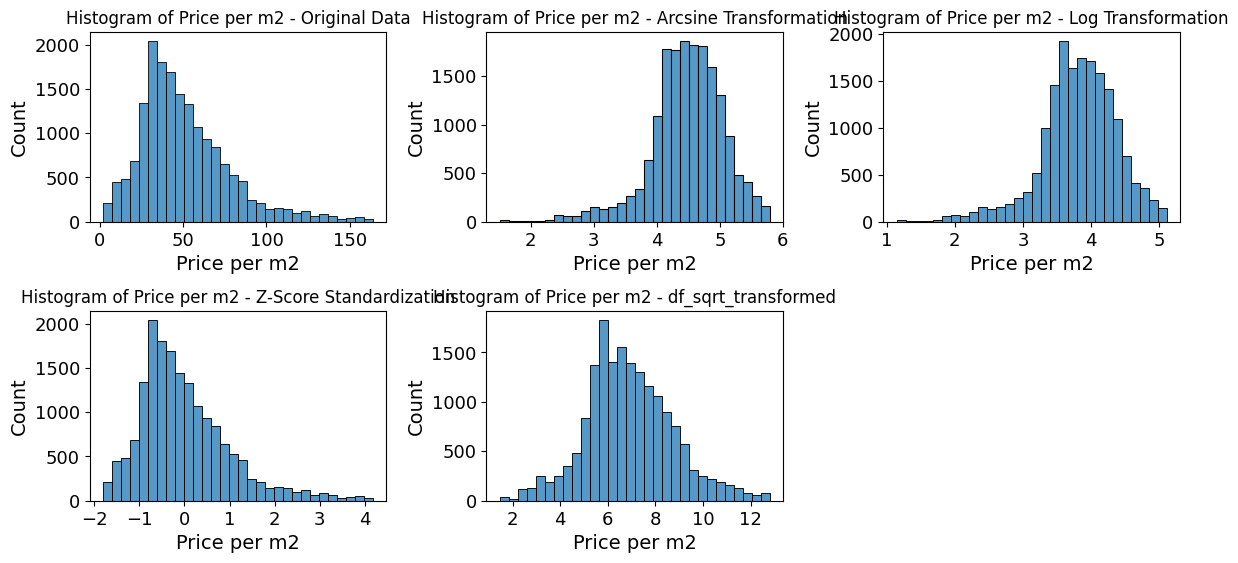

In [19]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']
plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    sns.histplot(data=data['Price per m2'], bins=30)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('Price per m2', fontsize = 14)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.title(f'Histogram of Price per m2 - {method}')
    plt.tight_layout()

plt.show()

*Histogram comparing the variable Area before and after normalization*

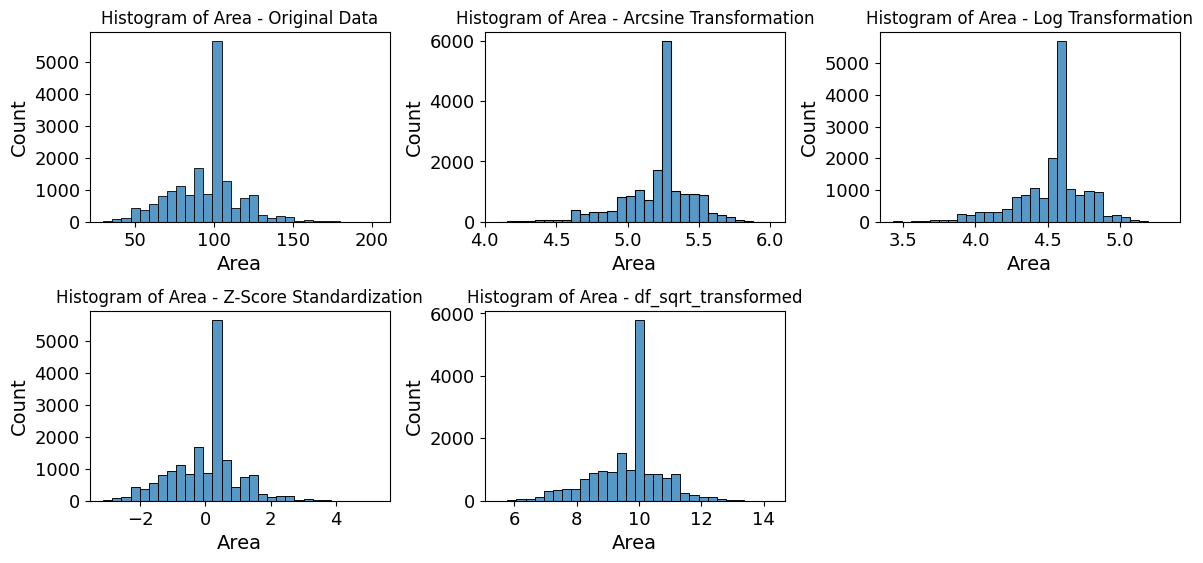

In [20]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']
plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    sns.histplot(data=data['Area'], bins=30)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('Area', fontsize = 14)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.title(f'Histogram of Area - {method}')
    plt.tight_layout()

plt.show()

*Use probability graph to verify whether the transformed data follows the normal distribution*

- Comparison of the distribution of the *Price* feature when applying normalization methods

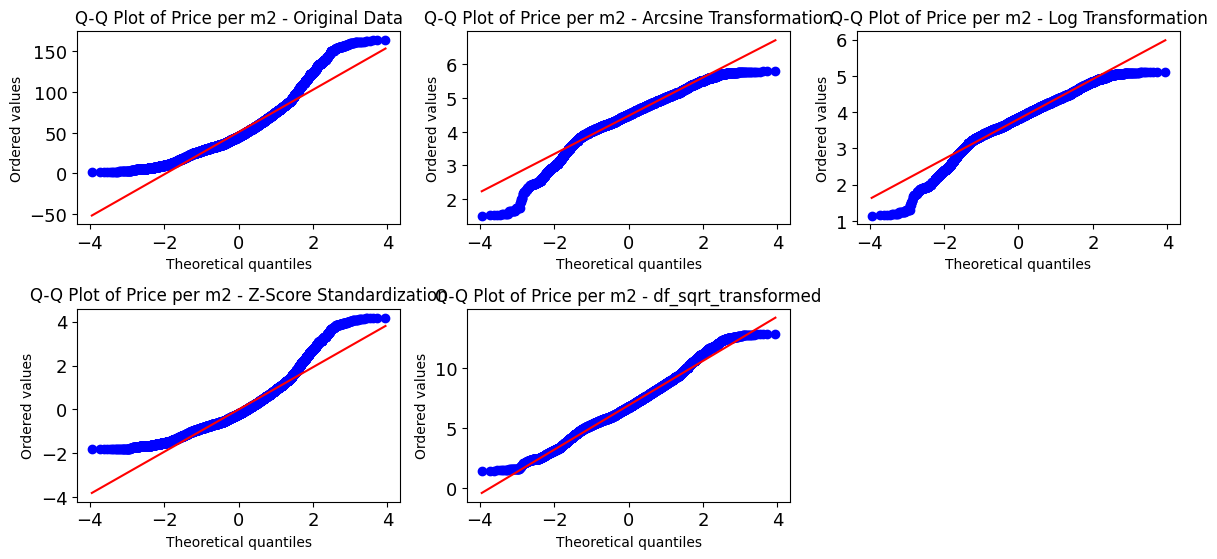

In [21]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Price per m2'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Price per m2 - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Area* feature when applying normalization methods

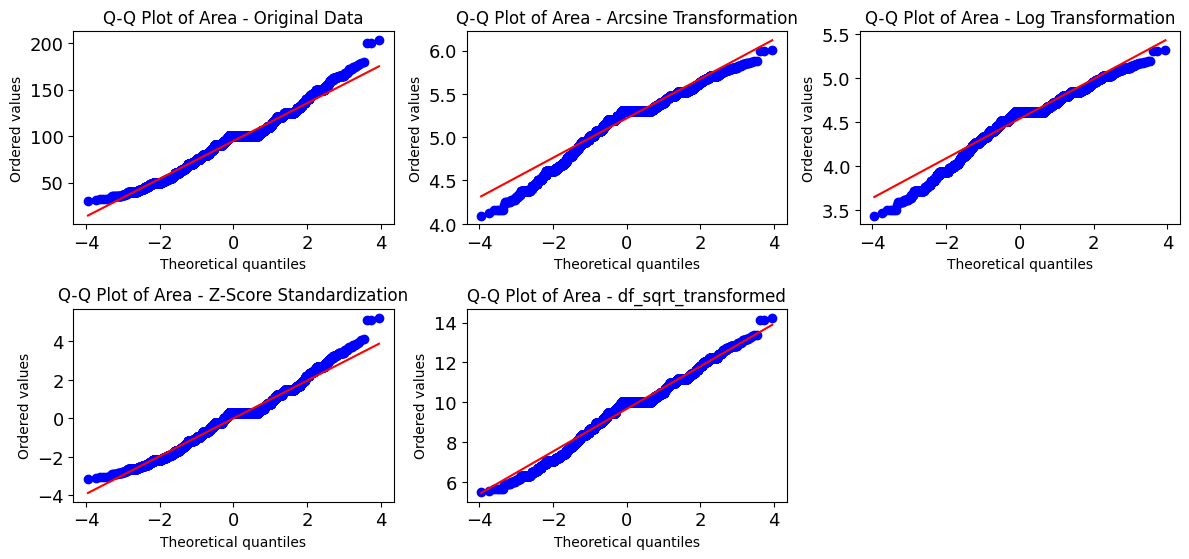

In [22]:
dfs = [df,df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Area'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Area - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Width* feature when applying normalization methods

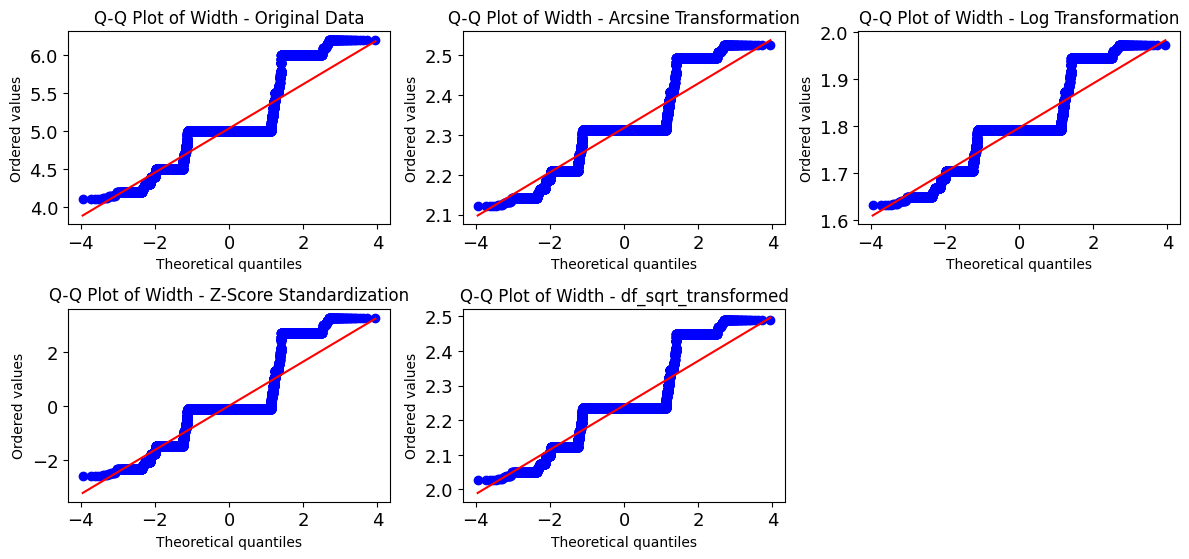

In [23]:
dfs = [df,  df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Width'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Width - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Longitude* feature when applying normalization methods

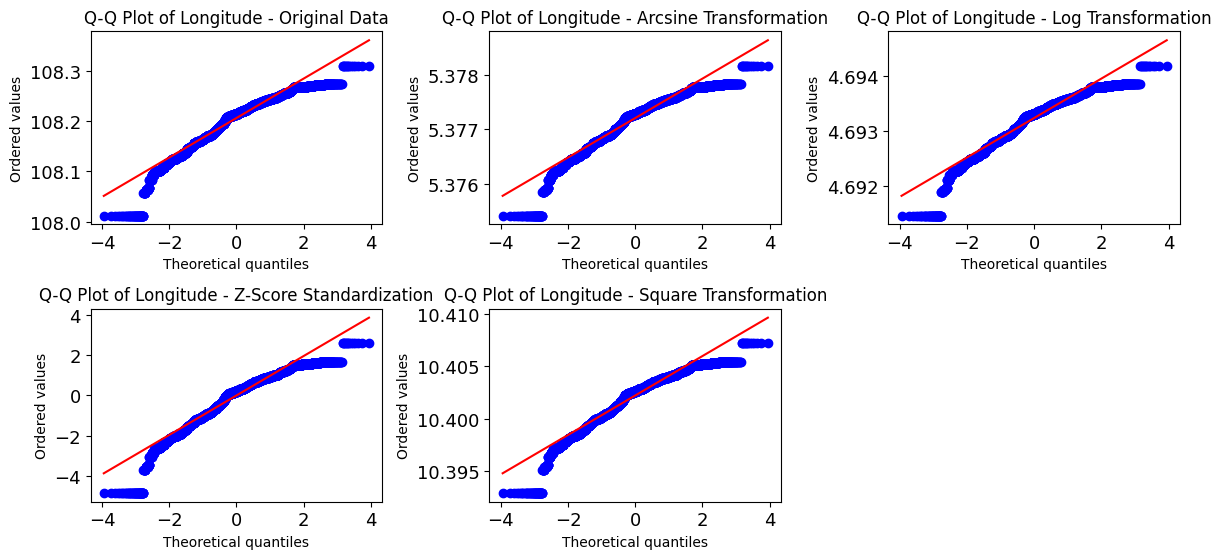

In [24]:
dfs = [df,  df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Longitude'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Longitude - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Latitude* feature when applying normalization methods

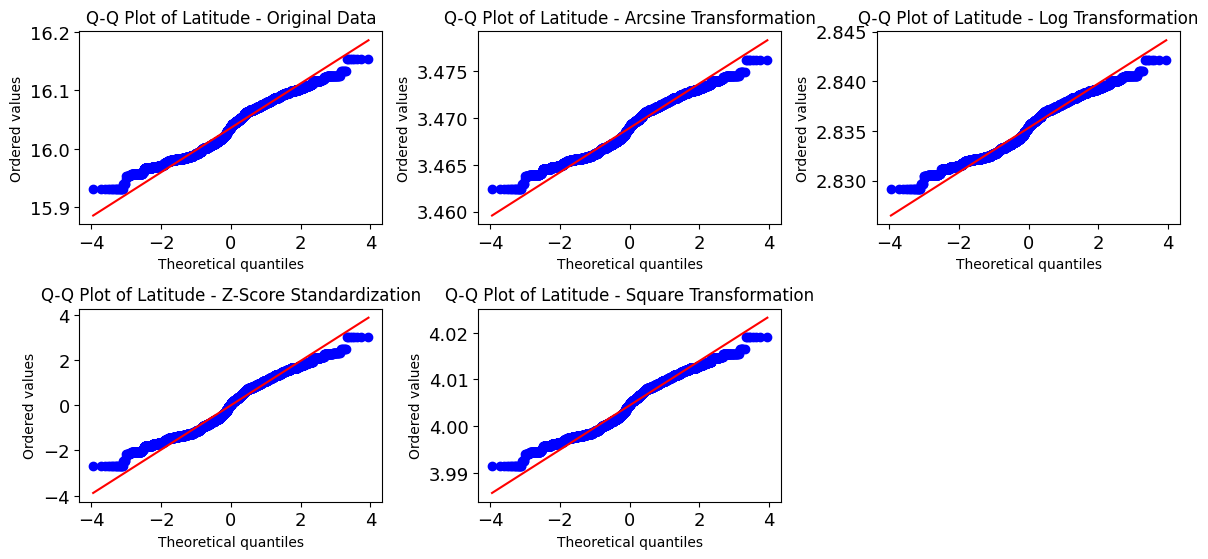

In [25]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Latitude'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Latitude - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Compares distribution of characteristics *Floors* when applying standardized methods

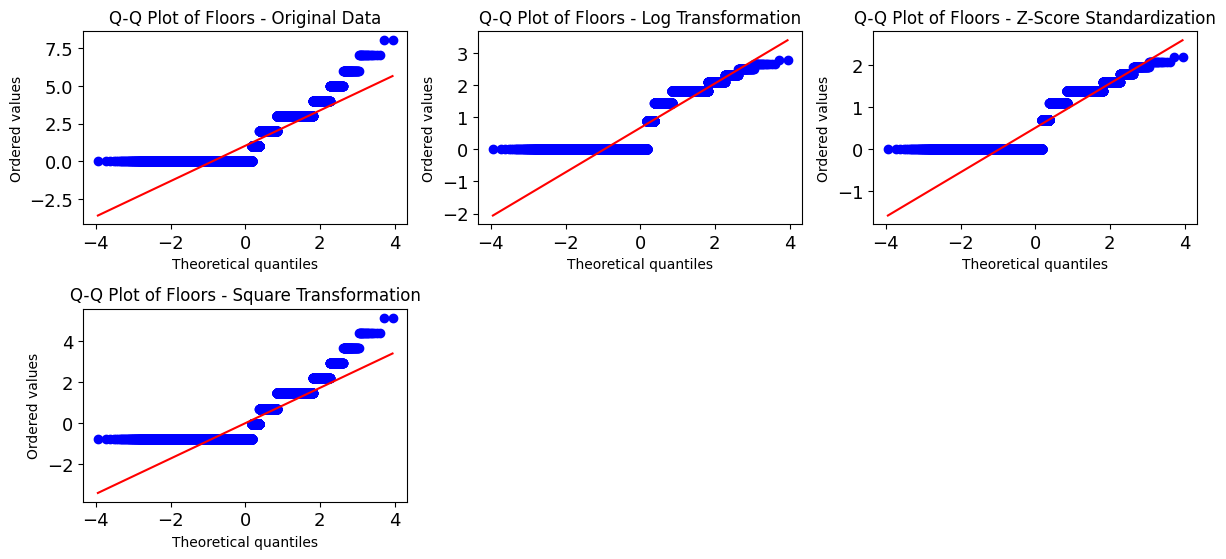

In [26]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data["Floors"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Floors - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Compares distribution of characteristics *Rooms* when applying standardized methods

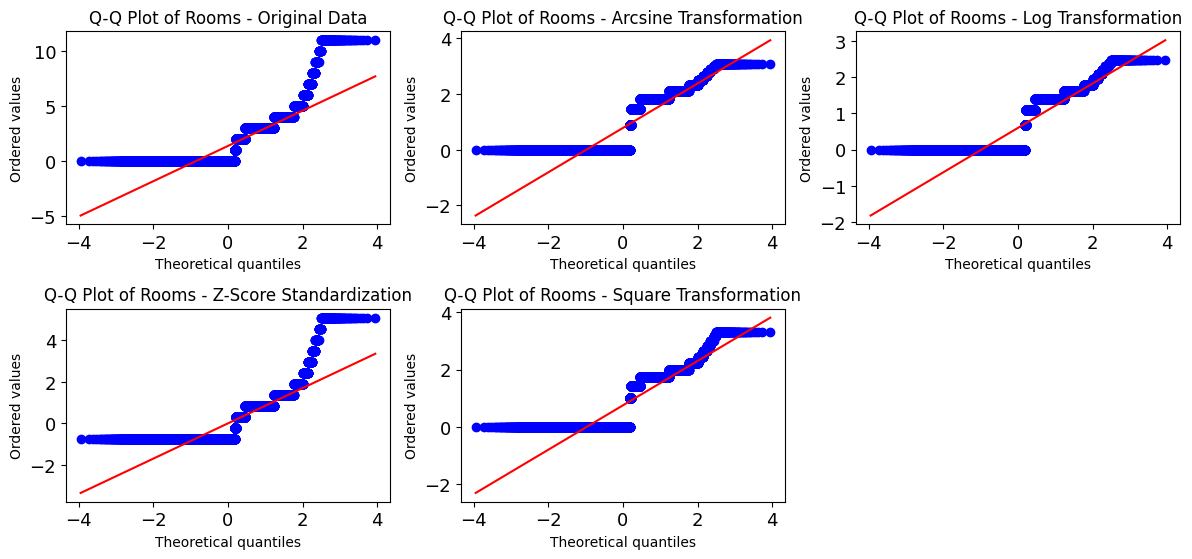

In [27]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data",'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data["Rooms"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Rooms - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Compares distribution of characteristics *Toilets* when applying standardized methods

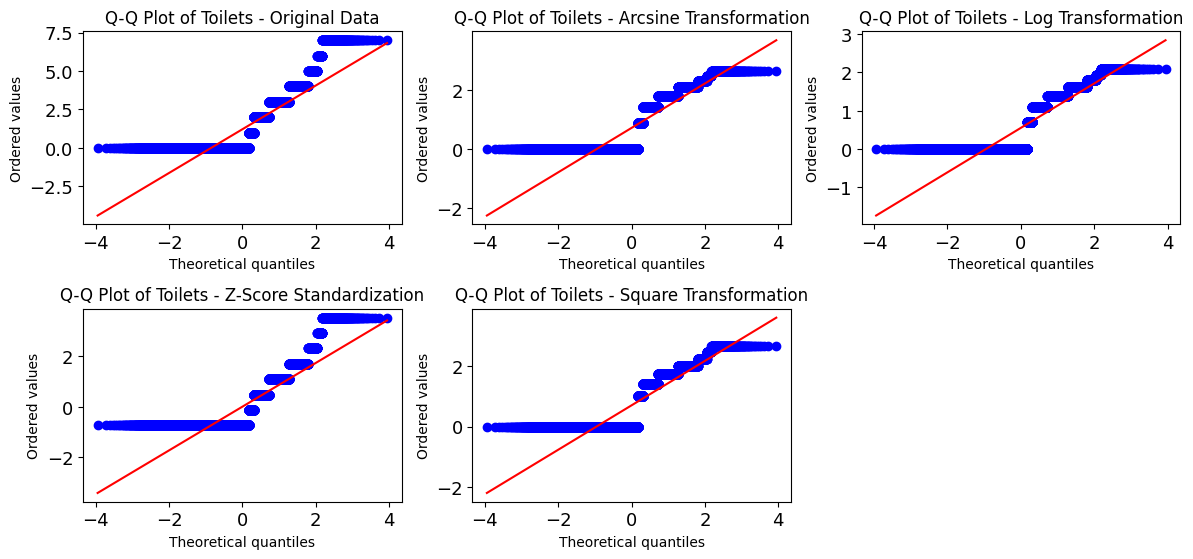

In [28]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Arcsine Transformation", "Log Transformation", "Z-Score Standardization", "Square Transformation"]

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data["Toilets"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Toilets - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

*The characteristic that follows the most normal distribution is standardized by the square root method.*

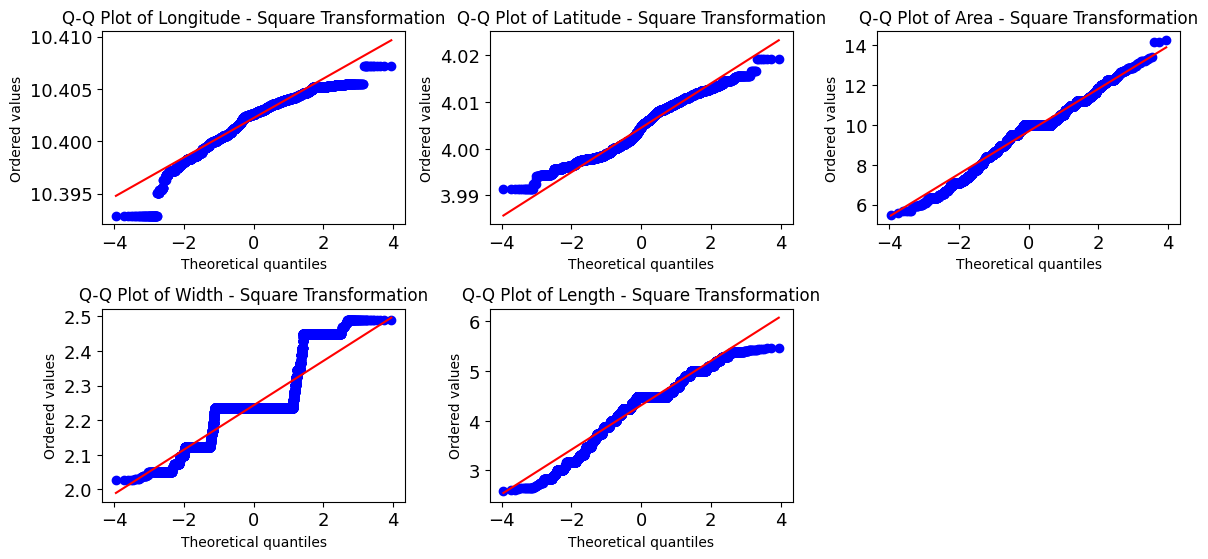

In [29]:
cols = ["Longitude", "Latitude", "Area", "Width", "Length"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) 
    stats.probplot(df_sqrt_transformed[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col} - Square Transformation")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

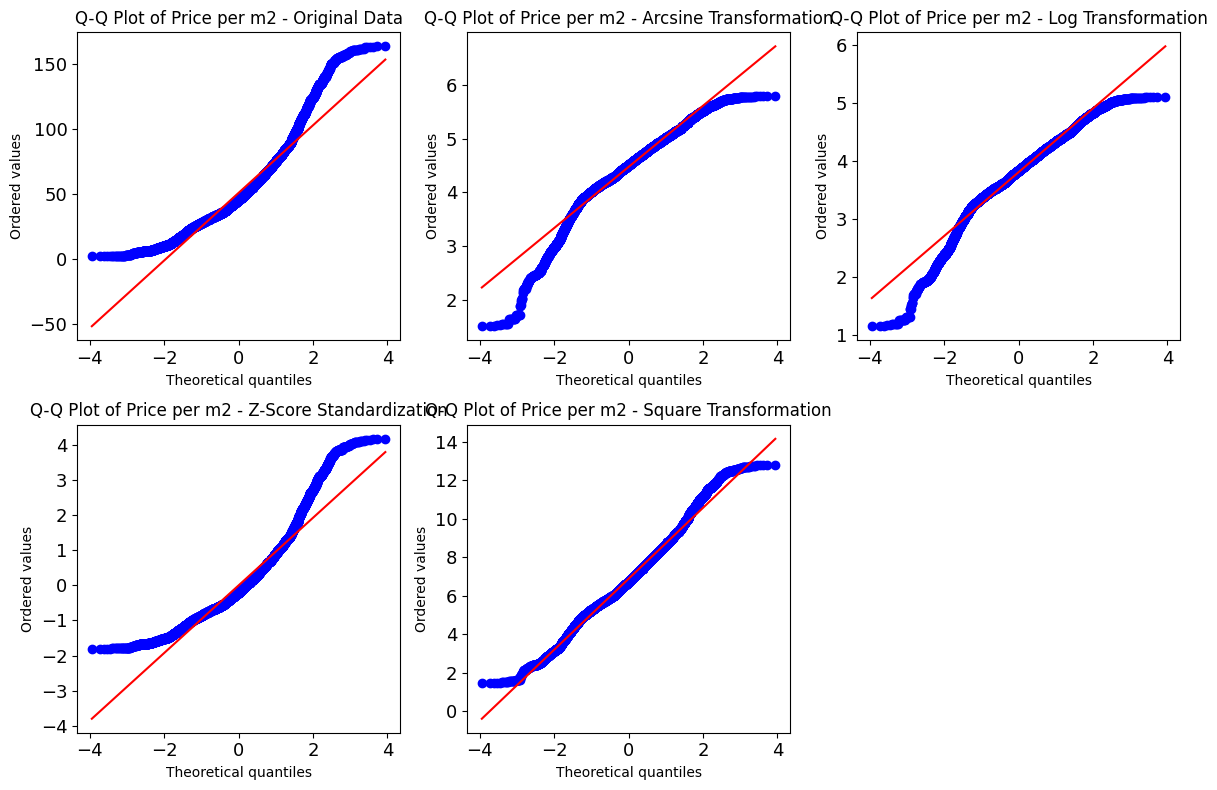

In [30]:
dfs = [df, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Arcsine Transformation", "Log Transformation", "Z-Score Standardization", "Square Transformation"]

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(2, 3, i)
    stats.probplot(data["Price per m2"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Price per m2 - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()

plt.show()

In [34]:
df_final = df.copy()
columns_sqrt = ["Price per m2", "Longitude","Latitude", "Width", "Area", "Length", "Floors", "Rooms", "Toilets"]
df_final[columns_sqrt] = df_sqrt_transformed[columns_sqrt]

df_final.head()

,Posted Time,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets,Price per m2,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,10.400602,4.003590,10.000000,2.236068,4.472136,0.0,0.0,0.0,1.581139,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,10.398891,4.009621,10.000000,2.236068,4.472136,0.0,0.0,0.0,1.581139,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,10.399521,4.008289,8.660254,2.236068,3.872983,0.0,0.0,0.0,1.932184,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,02/02/2025,10.397751,4.005646,10.000000,2.236068,4.472136,0.0,0.0,0.0,2.236068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,05/02/2025,10.400602,3.996527,10.954451,2.236068,4.472136,0.0,0.0,0.0,2.041241,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df_final.to_csv('TransformedData.csv', index=False)
print("DataFrame exported to CSV file.")

DataFrame exported to CSV file.


# General conclusion